In [1]:
import pandas as pd
import numpy as np
from numpy.random import rand

%matplotlib inline

from numpy.random import rand, seed
import seaborn as sns
import scipy.stats as stats
from matplotlib.pyplot import *

seed(10)

In [2]:
#Define the dictionary
inputs_labels = {'A' : 'Temperature', #C
                 'B' : 'Pressure', #bar
                 'C' : 'Mol ratio', #%
                 'D': 'Stirring rate'} #rpm

dat = [('A',20,40),
       ('B',1,1.2),
       ('C',0.2,1),
      ('D',1000, 1300)]

#Create columns and adding the data of the high and low values for each parameter. 
#Formatting the data, dividing into low and high 
inputs_df = pd.DataFrame(dat,columns=['index','low','high'])
#separating by index
inputs_df = inputs_df.set_index(['index'])
#Create a function to insert the data and label
inputs_df['label'] = inputs_df.index.map( lambda z : inputs_labels[z] )

inputs_df

,low,high,label
index,,,
A,20.0,40.0,Temperature
B,1.0,1.2,Pressure
C,0.2,1.0,Mol ratio
D,1000.0,1300.0,Stirring rate


In [3]:
inputs_df['average'] = inputs_df.apply( lambda z : ( z['high'] + z['low'])/2 , axis=1)
inputs_df['span'] = inputs_df.apply( lambda z : ( z['high'] - z['low'])/2 , axis=1)

inputs_df['encoded_low'] = inputs_df.apply( lambda z : ( z['low']  - z['average'] )/( z['span'] ), axis=1)
inputs_df['encoded_high'] = inputs_df.apply( lambda z : ( z['high'] - z['average'] )/( z['span'] ), axis=1)

inputs_df = inputs_df.drop(['average','span'],axis=1)

inputs_df

,low,high,label,encoded_low,encoded_high
index,,,,,
A,20.0,40.0,Temperature,-1.0,1.0
B,1.0,1.2,Pressure,-1.0,1.0
C,0.2,1.0,Mol ratio,-1.0,1.0
D,1000.0,1300.0,Stirring rate,-1.0,1.0


In [112]:
import itertools
#Creating a matrix with the encoded low and high values, and adding all the different combination in the results

encoded_inputs= list(itertools.product([-1,1],[-1,1],[-1,1],[-1,1]))
encoded_inputs

# Create the experiment design table (same as the book):
data=pd.DataFrame(encoded_inputs)
data=data[data.columns[::-1]]
data.columns=['A','B','C','D']
data

,A,B,C,D
0,-1,-1,-1,-1
1,1,-1,-1,-1
2,-1,1,-1,-1
3,1,1,-1,-1
4,-1,-1,1,-1
5,1,-1,1,-1
6,-1,1,1,-1
7,1,1,1,-1
8,-1,-1,-1,1
9,1,-1,-1,1


In [113]:
#Adding the results of the experiment

location ='C:/Users/tampa920/Box/Tamara_folder/Courses/Python_course/DoE_Course_Material/Week_2/Lab_1/Task_1/'

file_name = 'Ex6-2.csv'
data1 = pd.read_csv(location+file_name)



In [114]:
#Adding the respons to the full matrix
#data1['Rate']=Rate
#data=pd.DataFrame(encoded_inputs,columns=['A','B','C','D'])
data['Rate']=data1['Rate']
data

,A,B,C,D,Rate
0,-1,-1,-1,-1,45
1,1,-1,-1,-1,71
2,-1,1,-1,-1,48
3,1,1,-1,-1,65
4,-1,-1,1,-1,68
5,1,-1,1,-1,60
6,-1,1,1,-1,80
7,1,1,1,-1,65
8,-1,-1,-1,1,43
9,1,-1,-1,1,100


In [115]:
real_experiment = data

var_labels = []
for var in ['A','B','C','D']:
    var_label = inputs_df.loc[var]['label']
    var_labels.append(var_label)
    real_experiment[var_label] = results.apply(
        lambda z : inputs_df.loc[var]['low'] if z[var]<0 else inputs_df.loc[var]['high'] , 
        axis=1)

print("The values of each real variable in the experiment:")
real_experiment[var_labels]

The values of each real variable in the experiment:


,Temperature,Pressure,Mol ratio,Stirring rate
0,20.0,1.0,0.2,1000.0
1,20.0,1.0,0.2,1300.0
2,20.0,1.0,1.0,1000.0
3,20.0,1.0,1.0,1300.0
4,20.0,1.2,0.2,1000.0
5,20.0,1.2,0.2,1300.0
6,20.0,1.2,1.0,1000.0
7,20.0,1.2,1.0,1300.0
8,40.0,1.0,0.2,1000.0
9,40.0,1.0,0.2,1300.0


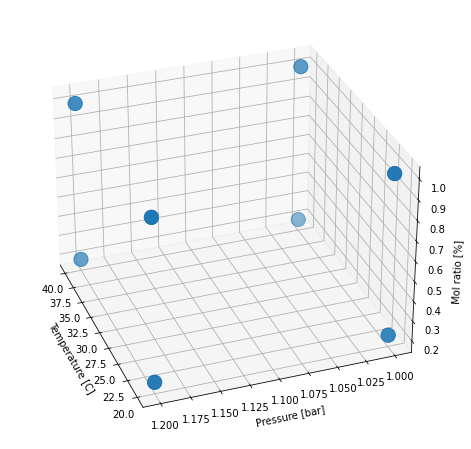

In [116]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 10})
# plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(real_experiment.Temperature,
             real_experiment.Pressure,
             real_experiment['Mol ratio'],
           s=200)
ax.set_xlabel('Temperature [C]')
ax.set_ylabel('Pressure [bar]')
ax.set_zlabel('Mol ratio [%]');
ax.view_init(30, 160)
plt.show()

In [117]:
#Computing the mean effect of the respons conditioned on each variable

labels = ['A','B','C','D']

main_effects = {}
rep=4
for j in range(0,rep):
    index=j+1
    for key in labels:
        effects = data.groupby(key)['Rate'].mean()
        main_effects[j,key] = sum( [i*effects[i] for i in [-1,1]])
        
print('Main effects')    
print(main_effects)

#average_main_effects = {}

#print('Average main effects')
#for key in labels:
 #       average_effects = data.groupby(key)['Rate'].mean()
  #      average_main_effects[key] = sum( [i*average_effects[i] for i in [-1,1]])
#print(average_main_effects)

Main effects
{(0, 'A'): 21.625, (0, 'B'): 3.125, (0, 'C'): 9.875, (0, 'D'): 14.625, (1, 'A'): 21.625, (1, 'B'): 3.125, (1, 'C'): 9.875, (1, 'D'): 14.625, (2, 'A'): 21.625, (2, 'B'): 3.125, (2, 'C'): 9.875, (2, 'D'): 14.625, (3, 'A'): 21.625, (3, 'B'): 3.125, (3, 'C'): 9.875, (3, 'D'): 14.625}


# Twoway interaction

In [118]:
import itertools


#Divide labels in different combinations that will work
twoway_labels = list(itertools.combinations(labels, 2))


twoway_effects = {}
for key in twoway_labels:
    
    effects = data.groupby([key[0],key[1]])['Rate'].mean()
    
    #i*j kollar om effekten är positiv eller neg 
    
    twoway_effects[key] = sum([ i*j*effects[i][j]/2 for i in [-1,1] for j in [-1,1] ])
twoway_effects

{('A', 'B'): 0.125,
 ('A', 'C'): -18.125,
 ('A', 'D'): 16.625,
 ('B', 'C'): 2.375,
 ('B', 'D'): -0.375,
 ('C', 'D'): -1.125}

# Threeway interaction

In [119]:
import itertools

threeway_labels = list(itertools.combinations(labels, 3))

threeway_effects = {}
for key in threeway_labels:
    
    effects = data.groupby([key[0],key[1],key[2]])['Rate'].mean()
    
    threeway_effects[key] = sum([ i*j*k*effects[i][j][k]/4 for i in [-1,1] for j in [-1,1] for k in [-1,1] ])

threeway_effects

{('A', 'B', 'C'): 1.875,
 ('A', 'B', 'D'): 4.125,
 ('A', 'C', 'D'): -1.625,
 ('B', 'C', 'D'): -2.625}

# Fourway interaction

In [129]:
fourway_labels = list(itertools.combinations(labels, 4))

fourway_effects = {}
for key in fourway_labels:
    
    effects = data.groupby([key[0],key[1],key[2],key[3]])['Rate'].mean()
    
    fourway_effects[key] = sum([ i*j*k*l*effects[i][j][k][l]/8 for i in [-1,1] for j in [-1,1] for k in [-1,1] for l in [-1,1] ])

fourway_effects

{('A', 'B', 'C', 'D'): 1.375}

In [121]:
effects=[] #pd.DataFrame({})
indexes=[]
for i,k in enumerate(average_main_effects.keys()):
    effects.append(abs(average_main_effects[k]))
    indexes.append(k)
for i,k in enumerate(twoway_effects.keys()):
    effects.append(abs(twoway_effects[k]))
    indexes.append(k)
for i,k in enumerate(threeway_effects.keys()):
    effects.append(abs(threeway_effects[k]))
    indexes.append(k)    
for i,k in enumerate(fourway_effects.keys()):
    effects.append(abs(fourway_effects[k]))
    indexes.append(k) 
    
effects_df=pd.DataFrame({"Standardized effect":effects})

# reset the indexes
effects_df.index=indexes
# Sort values in descending order
effects_df = effects_df.sort_values(by='Standardized effect', ascending=False)
# Add cumulative percentage column
effects_df["cum_percentage"] = round(effects_df["Standardized effect"].cumsum()/effects_df["Standardized effect"].sum()*100,2)

# Display data frame
effects_df

,Standardized effect,cum_percentage
A,21.625000,21.61
"(A, C)",18.125000,39.72
"(A, D)",16.625000,56.33
D,14.625000,70.94
C,9.875000,80.81
"(A, B, D)",4.125000,84.93
B,3.125000,88.05
"(B, C, D)",2.625000,90.67
"(B, C)",2.375000,93.05
"(A, B, C)",1.875000,94.92


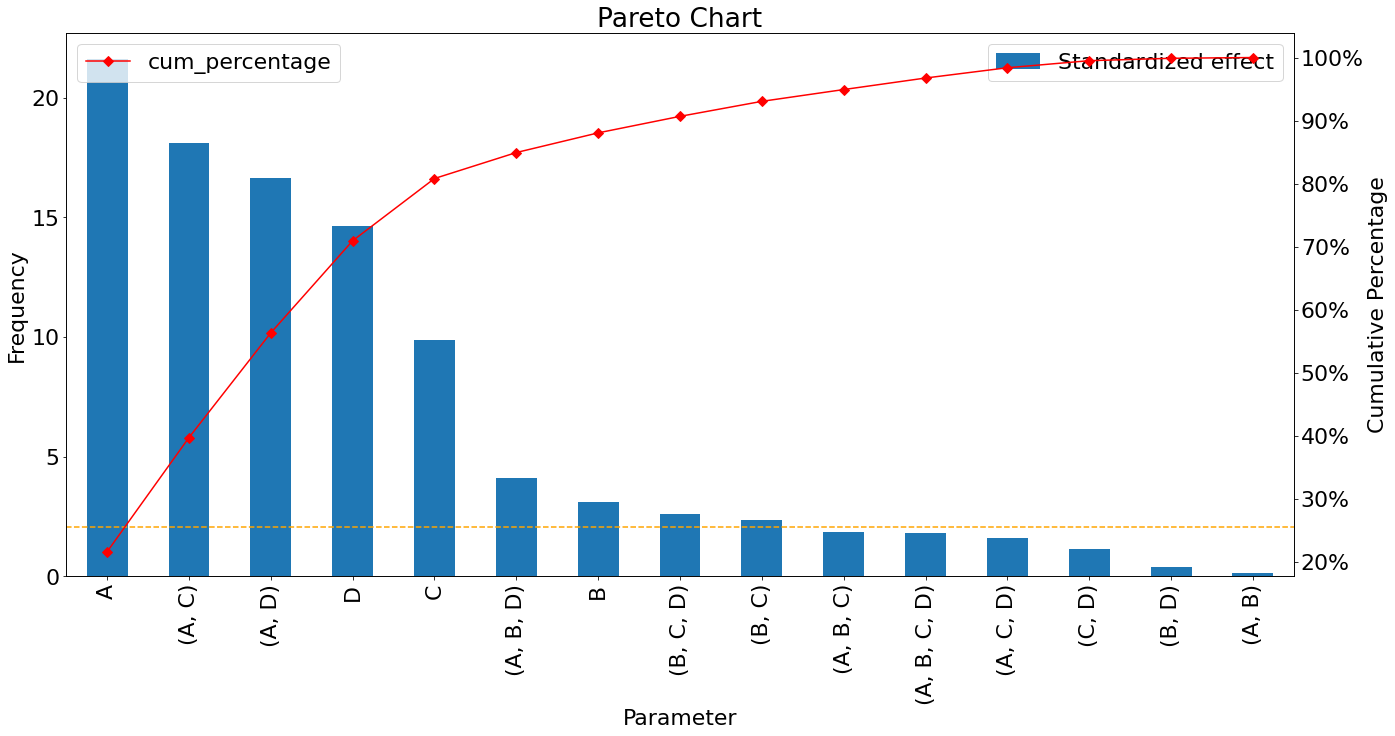

In [82]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
plt.rcParams.update({'font.size': 22})
# Set figure and axis
fig, ax = plt.subplots(figsize=(22,10))

# Plot bars (i.e. frequencies)
ax.set_title("Pareto Chart")
ax.set_xlabel("Parameter")
ax.set_ylabel("Frequency");
effects_df.plot.bar(y='Standardized effect', ax=ax)
ax.axhline(2.06, color="orange", linestyle="dashed")

# Second y axis (i.e. cumulative percentage)
ax2 = ax.twinx()
#ax2.plot(effects_df.index, effects_df["cum_percentage"], color="red", marker="D", ms=7)
effects_df.plot(y="cum_percentage", color="red", marker="D", ms=7, ax=ax2)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage");

# Negative effect values for the Q-Q plot

In [140]:
effects1=[] #pd.DataFrame({})
indexes=[]
for i,k in enumerate(average_main_effects.keys()):
    effects1.append(average_main_effects[k])
    indexes.append(k)
for i,k in enumerate(twoway_effects.keys()):
    effects1.append(twoway_effects[k])
    indexes.append(k)
for i,k in enumerate(threeway_effects.keys()):
    effects1.append(threeway_effects[k])
    indexes.append(k)    
for i,k in enumerate(fourway_effects.keys()):
    effects1.append(fourway_effects[k])
    indexes.append(k) 
    
effects1_df=pd.DataFrame({"Standardized effect":effects})

# reset the indexes
effects1_df.index=indexes
# Sort values in descending order
effects1_df = effects_df.sort_values(by='Standardized effect', ascending=False)
# Add cumulative percentage column
effects1_df["cum_percentage"] = round(effects_df["Standardized effect"].cumsum()/effects_df["Standardized effect"].sum()*100,2)

# Display data frame
effects1_df

,Standardized effect,cum_percentage
A,21.625,41.69
B,16.625,73.73
C,14.625,101.93
D,9.875,120.96
"(A, B)",4.125,128.92
"(A, C)",3.125,134.94
"(A, D)",2.375,139.52
"(B, C)",1.875,143.13
"(B, D)",1.375,145.78
"(C, D)",0.125,146.02


Text(0.5, 1.0, 'Rate')

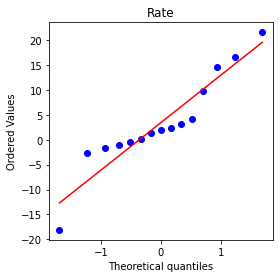

In [139]:
from matplotlib.pyplot import *
import scipy.stats as stats
fig = figure(figsize=(4,4))
ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(132)
#ax3 = fig.add_subplot(133)

stats.probplot(effects1_df["Standardized effect"], dist="norm", plot=ax1, fit=False)
ax1.set_title('Rate')

#stats.probplot(y2, dist="norm", plot=ax2)
#ax2.set_title('y2')

#stats.probplot(y3, dist="norm", plot=ax3)
#ax3.set_title('y3')

In [130]:
s = "yhat = "

s += "%0.3f "%(data['Rate'].mean())

for i,k in enumerate(average_main_effects.keys()):
    if(average_main_effects[k]<0):
        s += "%0.3f %s "%( average_main_effects[k]/2.0, k )
    else:
        s += "+ %0.3f %s "%( average_main_effects[k]/2.0, k )

for i,k in enumerate(twoway_effects.keys()):
    if(twoway_effects[k]<0):
        s += " %0.3f %s %s"%( twoway_effects[k]/2.0, k[0],k[1])
    else:
        s += "+ %0.3f %s %s"%( twoway_effects[k]/2.0, k[0],k[1])

for i,k in enumerate(threeway_effects.keys()):
    if(threeway_effects[k]<0):
        s += " %0.3f %s %s %s"%( threeway_effects[k]/2.0, k[0],k[1], k[2])
    else:
        s += "+ %0.3f %s %s %s"%( threeway_effects[k]/2.0, k[0],k[1], k[2])
        
for i,k in enumerate(fourway_effects.keys()):
    if(fourway_effects[k]<0):
        s += " %0.3f %s %s %s %s"%(fourway_effects[k]/2.0, k[0],k[1], k[2],k[3])
    else:
        s += "+ %0.3f %s %s %s %s"%(fourway_effects[k]/2.0, k[0],k[1], k[2],k[3])


print(s)

yhat = 70.062 + 10.812 A + 1.562 B + 4.938 C + 7.312 D + 0.062 A B -9.062 A C+ 8.312 A D+ 1.188 B C -0.188 B D -0.562 C D+ 0.938 A B C+ 2.062 A B D -0.812 A C D -1.312 B C D+ 0.688 A B C D


# Uncertancies coming up! 

In [131]:
sigmasquared = 0.0050
#The len() function returns the number of items in an object.
k = len(inputs_df.index)
Vmean = (sigmasquared)/(2**k)
Veffect = (4*sigmasquared)/(2**k)
print("Variance in mean: %0.06f"%(Vmean))
print("Variance in effects: %0.6f"%(Veffect))

Variance in mean: 0.000313
Variance in effects: 0.001250


In [132]:
sigmasquared = 0.0050
r=4
k = len(inputs_df.index)
Vmean = (sigmasquared)/(r*2**k)
Veffect = (4*sigmasquared)/(r*2**k)
print("Variance in mean: %0.6f"%(Vmean))
print("Variance in effects: %0.6f"%(Veffect))

Variance in mean: 0.000078
Variance in effects: 0.000313


In [133]:
print(np.sqrt(Vmean))
print(np.sqrt(Veffect))

0.008838834764831844
0.017677669529663688


In [134]:
unc_a_0 = np.sqrt(Vmean)
print(unc_a_0)

0.008838834764831844


# Almost there!
Now we want to reduce and take away the noise, to only include the things with a large impact

In [142]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [150]:
#Rate = data['Rate']
#Paramters that impact the response
xlabs=['A','C','D']
x = data[xlabs]
x = sm.add_constant(x)

res1 = smf.ols(formula='Rate ~ A + D + C + A:C + A:D', data=data).fit()

res1.summary()

C:\Users\tampa920\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rate   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     56.74
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           5.14e-07
Time:                        16:03:12   Log-Likelihood:                -42.711
No. Observations:                  16   AIC:                             97.42
Df Residuals:                      10   BIC:                             102.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.0625      1.104     63.444      0.000      67.602      72.523
A             10.8125      1.104      9.791      0.000       8.352      13.273
D              7.3125      1.104      6.622      0.000       4.852       9.773
C              4.9375      1.104      4.471      0.001       2.477       7.398
A:C           -9.0625      1.104     -8.206      0.000     -11.523      -6.602
A:D            8.3125      1.104      7.527      0.000       5.852      10.773
==============================================================================
Omnibus:                        0.740   Durbin-Watson:                   1.522
Prob(Omnibus):                  0.691   Jarque-Bera (JB):                0.738
Skew:                          -0.350   Prob(JB):                        0.691
Kurtosis:                       2.215   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""